In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
path = '../../Input_Data/resource_data.json'
with open(path, 'r') as file:
    data = json.load(file)

wind_energy = data['series'][1]['data']
solar_energy = data['series'][2]['data']
hydro_energy = data['series'][3]['data']

In [3]:
# Have 165 hours and you want minute by minute resolution. Therefore the total length of this list needs to be 165 * 60 in length
# The first 60 values of the list need to equal 0, the next need to equal 1. Therefore, i // 60
wind_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(wind_energy_7_days)):
    wind_energy_7_days[i] = wind_energy[ i // 60 ]['value']

solar_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(solar_energy_7_days)):
    solar_energy_7_days[i] = solar_energy[ i // 60 ]['value']

hydro_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(hydro_energy_7_days)):
    hydro_energy_7_days[i] = hydro_energy[ i // 60 ]['value']

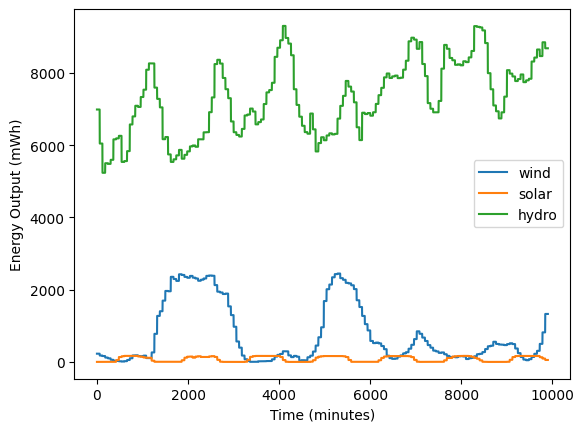

In [4]:
x_values = np.array([i for i in range(165 * 60)])

wind_graph_yvalues = np.array(wind_energy_7_days)
solar_graph_yvalues = np.array(solar_energy_7_days)
hydro_graph_yvalues = np.array(hydro_energy_7_days)

plt.plot(x_values, wind_graph_yvalues, label='wind')
plt.plot(x_values, solar_energy_7_days, label='solar')
plt.plot(x_values, hydro_energy_7_days, label='hydro')

plt.legend()
plt.xlabel("Time (minutes)")
plt.ylabel("Energy Output (mWh)")

plt.show()

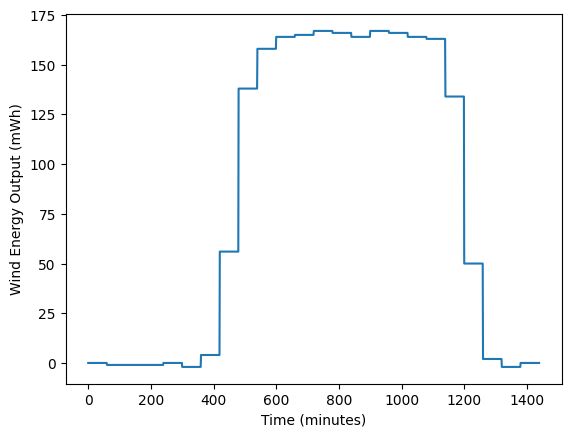

In [5]:
total = []
for i in range(165 * 60):
    sum = wind_energy_7_days[i] + solar_energy_7_days[i] + hydro_energy_7_days[i]
    total.append(sum)

day = 2

x_values = np.array([i for i in range(24 * 60)])
solar_energy_7_days = np.array(solar_energy_7_days[(day*24) * 60:(day+1) * 24 * 60])

plt.plot(x_values, solar_energy_7_days)

plt.xlabel("Time (minutes)")
plt.ylabel("Wind Energy Output (mWh)")

plt.show()